<< Thu Big Data Challenge 2019 >>

Author : Andy RK Chang & 陳宇修

Date : Jul 20, 2019

Version : 1.01


G11-1-AC(7X15)20160126-002_Export.txt  ===> G11-1-AC(7X15)20160126-002Export.txt

G15-AC(7X15)20160707-003_Export.txt ====> G15 -AC(7X15)20160707-003_Export.txt


## (*****) Setup Python Training Environment

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plts
import math
import glob
import os.path
from operator import mod

from scipy import stats

%matplotlib inline

## (*****) Read file from Google Drive

In [23]:
# Read file from Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##  (*****) Function Definition

In [0]:
# global variable definition and initial

myDriveFilePath = '/content/gdrive/My Drive/thubigdata2019/training230/'
recipeGroup = ['G11','G15', 'G17', 'G19', 'G32', 'G34', 'G48', 'G49']
examFilePath =  '/content/gdrive/My Drive/thubigdata2019/exam/'

# color definition refer to https://www.cnblogs.com/darkknightzh/p/6117528.html
PTCcolor = ['purple','red','coral','saddlebrown','orange','olive','limegreen','blue','cyan','yellow'] 

rgColumns = ['filename','groupid','eqpid','date','sno','PTCno',
             'count','mean','std','min','Q1','Q2','Q3','max','median']

## ,'start2max_time','stable_time','max2end_time','totaltime' ]


In [8]:
## Function Module

#
# get RecipeGroup File List function 
#
def getRecipeGroupFileList(aRecipeGroup):

  aFileList = glob.glob( myDriveFilePath + aRecipeGroup +  "/*.txt")
    
  return aFileList

#
# get exam File List function 
#
def getExamFileList():

  aFileList = glob.glob( examFilePath +  "*.txt")
    
  return aFileList


#
# get file attribute function
#
def getFileAttributeList(aFile, aTraining):

  #filename : G11-1-AC(7X15)20160126-002_Export
  #groupid : G11
  #eqpid : AC(7X15)
  #date : 20160126
  #sno : 002
  
  aFileAttributeList=[]
  
  if aTraining == True:
    aFileAttributeList.append(aFile)                                                #filename 0
    aFileAttributeList.append(aFile[aFile.find('G')+1:aFile.find('G')+3])           #groupid 1
    aFileAttributeList.append(aFile[aFile.find('AC'):aFile.find(')')+1])            #eqpid 2
    aFileAttributeList.append(aFile[aFile.find(')')+1 : aFile.find(')')+9 ])        #date 3
    aFileAttributeList.append(aFile[aFile.find('_')-3 : aFile.find('_') ])          #sno 4
  else:
    aFileAttributeList.append(aFile)                                                #filename 0
    aFileAttributeList.append('Nan')           #groupid 1
    aFileAttributeList.append('Nan')            #eqpid 2
    aFileAttributeList.append('Nan')        #date 3
    aFileAttributeList.append('Nan')          #sno 4    
  
  
  return aFileAttributeList

#
# read recipe Group file data function
#
def readRecipeGroupFile(aFileName):
  
  fp = pd.read_csv(aFileName,sep="\t")                                # read file 分隔符號為 tab /t'
  fp = fp.drop([0])                                                   # drop defoF
  fp = fp.drop(columns=['Unnamed: ' + str(len(fp.columns)-1)])        # drop nonname column
  fp = fp.apply(pd.to_numeric, errors='coerce')                       # str to numeric
  
  return fp

#
# fix exam file data format function
#
def fixExamFile():
  
  aFile ='/content/gdrive/My Drive/thubigdata2019/exam/1.txt'
  
  fp = pd.read_csv(aFileName,sep="\t")                                # read file 分隔符號為 tab /t'
  fp = fp.drop([0])                                                   # drop defoF
  fp = fp.drop(columns=['Unnamed: ' + str(len(fp.columns)-1)])        # drop nonname column
  fp = fp.apply(pd.to_numeric, errors='coerce')                       # str to numeric
  
  return fp

#
# plot 成化曲線
#
def plotRecipeGroupFileCurve(aDf, aRG, aFN):
  
  # Draw Plot    
  plt.figure(figsize=(10,8), dpi= 160)
  fig, ax = plt.subplots()
  
  range = np.arange(len(aDf.columns))
  
  for i in range:
    aPTCno = aDf.columns[i].strip()      
    aPTCno = aPTCno[aPTCno.find('PTC')+3: len(aPTCno)]
    ax.plot(aDf.columns[i], data=aDf, color = PTCcolor[mod(int(aPTCno),10)], label=aDf.columns[i].strip())
    ax.axis([0, 400, 0, 400])
    ax.set_title('recipe Group :' + aRG + ' ;  File No : ' + aFN, fontsize=12,color='r')
    
  plt.legend()
  #plt.show()
  

## (*****) Main() 


pre-dataprocess Recipe Group File Data

In [26]:
_logFlag = False
_plotFlag = False
_plotRecipeGroup = 7

rgdf = pd.DataFrame(columns=rgColumns)

rangei = np.arange(len(recipeGroup))

for i in rangei:
  
  aRecipeGroupFileList = getRecipeGroupFileList(recipeGroup[i])
  
  rangej = np.arange(len(aRecipeGroupFileList))
                                                
  for j in rangej:     
  
    df = readRecipeGroupFile(aRecipeGroupFileList[j])
    
    rangek = np.arange(len(df.columns))
    
    for k in rangek:
            
      aFileAttributeList = getFileAttributeList(os.path.basename(aRecipeGroupFileList[j]), True)      
      
      aPTCno = df.columns[k].strip()      
      aFileAttributeList.append(aPTCno[aPTCno.find('PTC'): len(aPTCno)])                   #6. PTCno
      
      aFileAttributeList.append(df.count()[k])                   #7. count
      aFileAttributeList.append(df.mean()[k])                    #8. mean
      aFileAttributeList.append(df.std()[k])                     #9. std
      aFileAttributeList.append(df.min()[k])                     #10. min
      aFileAttributeList.append(df.quantile(0.25)[k])            #11. Q1 25%
      aFileAttributeList.append(df.quantile(0.5)[k])             #12. Q2 50%
      aFileAttributeList.append(df.quantile(0.75)[k])            #13. Q3 75%
      aFileAttributeList.append(df.max()[k])                     #14. max
      aFileAttributeList.append(df.median()[k])                  #15. median
      #aFileAttributeList.append()   #16. start2max_time
      #aFileAttributeList.append()   #17. stable_time
      #aFileAttributeList.append()   #18. max2end_time
      #aFileAttributeList.append()   #19. totaltime

      if j == 0 and _logFlag == True:
        print(aFileAttributeList)
      
      rgdf = rgdf.append(pd.DataFrame([aFileAttributeList], columns=rgColumns),ignore_index=True)
        
    # plot the 1st file curve for each recipe group
    #if j == 0:        
      #plotRecipeGroupFileCurve(df)    
    
    # plot the same recipe group all file curve
    if i == _plotRecipeGroup and _plotFlag == True:        
      plotRecipeGroupFileCurve(df,recipeGroup[i], str(j))
      
rgdf.describe()

,mean,std,min,Q1,Q2,Q3,max,median
count,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000
mean,226.490533,76.151926,74.610659,159.136633,261.295072,294.752493,297.266246,261.295072
std,32.115011,17.810632,10.009552,20.780343,47.318608,45.591896,44.259811,47.318608
min,18.282831,39.758527,0.000000,0.000000,0.000000,0.000000,162.000000,0.000000
25%,203.731024,61.218525,71.600000,156.575000,226.250000,257.625000,263.400000,226.250000
50%,212.706130,69.254516,74.600000,162.700000,248.300000,266.300000,270.400000,248.300000
75%,259.797581,96.030889,79.200000,167.775000,313.100000,350.400000,351.800000,313.100000
max,280.642357,160.490151,97.300000,201.300000,351.050000,357.900000,370.100000,351.050000


In [27]:
rgdf.columns

Index(['filename', 'groupid', 'eqpid', 'date', 'sno', 'PTCno', 'count', 'mean',
       'std', 'min', 'Q1', 'Q2', 'Q3', 'max', 'median'],
      dtype='object')

In [28]:
rgdf.head(3)

,filename,groupid,eqpid,date,sno,PTCno,count,mean,std,min,Q1,Q2,Q3,max,median
0,G11-1-AC(7X15)20160511-002_Export.txt,11,AC(7X15),20160511,002,PTC10,258,273.026357,93.075181,77.5,193.850,323.60,352.70,354.0,323.60
1,G11-1-AC(7X15)20160511-002_Export.txt,11,AC(7X15),20160511,002,PTC11,258,275.516667,93.810080,77.4,195.175,332.40,353.70,354.3,332.40
2,G11-1-AC(7X15)20160511-002_Export.txt,11,AC(7X15),20160511,002,PTC12,258,273.703876,91.688239,77.5,196.925,321.75,352.65,354.3,321.75


In [29]:
df.head(3)

,G49-PTC4,G49-PTC6,G49-PTC14,G49-PTC20,G49-PTC26,G49-PTC30,G49-PTC47,G49-PTC48
1,70.9,71.1,73.5,71.7,70.7,69.5,73.8,73.1
2,70.9,71.1,73.5,71.7,70.7,69.5,73.8,73.1
3,70.9,71.1,73.5,71.7,70.7,69.5,73.8,73.1


## Plot File Curve

In [150]:
rangei = np.arange(len(recipeGroup))

for i in rangei:
  
  aRecipeGroupFileList = getRecipeGroupFileList(recipeGroup[i])
                                                
  rangej = np.arange(len(aRecipeGroupFileList))
  
  for j in rangej:     
  
    df = readRecipeGroupFile(aRecipeGroupFileList[j])
    
    plotRecipeGroupFileCurve(df,recipeGroup[i], str(j+1))
    

Output hidden; open in https://colab.research.google.com to view.

## (*****) Classification Model Build

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics

### KNN Model

In [0]:
# df=df.values (dataframe to array)
rgdf_data = rgdf.drop(['filename','groupid','eqpid','PTCno','sno', 'date'], axis = 1)
rgdf_target = rgdf['groupid'].values

In [0]:
rgdf_data

In [0]:
train_x , test_x , train_y , test_y = train_test_split(rgdf_data,rgdf_target,test_size=0.2)

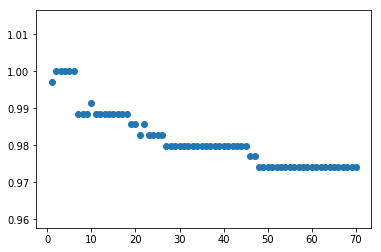

2


In [110]:
# 選擇 k
range = np.arange(1, round(0.05 * train_x.shape[0]) + 1)
accuracies = []

for i in range:
    clf = KNeighborsClassifier(n_neighbors = i)
    rg_clf = clf.fit(train_x, train_y)
    test_y_predicted = rg_clf.predict(test_x)
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    accuracies.append(accuracy)

# 視覺化
plt.scatter(range, accuracies)
plt.show()
appr_k = accuracies.index(max(accuracies)) + 1
print(appr_k)

In [111]:
# 建立分類器
clf = KNeighborsClassifier(n_neighbors = 2)
rg_clf = clf.fit(train_x, train_y)

# 預測
test_y_predicted = rg_clf.predict(test_x)
print(test_y_predicted)

# 標準答案
print(test_y)

accuracy = metrics.accuracy_score(test_y, test_y_predicted)

print('=======')
print('KNN Model, K=1, Accuracy Rate = ', accuracy * 100)

print('=======')
range = np.arange(len(test_y))

for i in range:
  
  if test_y[i] != test_y_predicted[i]:
    print(i , ' test_y', test_y[i], '; test_y_predicted', test_y_predicted[i], '; test_data_index', test_x.index[i])



['32' '48' '34' '19' '34' '48' '32' '15' '49' '34' '11' '32' '34' '48'
 '11' '32' '34' '15' '19' '32' '11' '32' '17' '32' '34' '34' '19' '32'
 '34' '19' '48' '11' '17' '32' '49' '32' '49' '19' '49' '49' '34' '34'
 '15' '34' '17' '15' '15' '32' '15' '19' '19' '48' '15' '34' '11' '48'
 '34' '49' '32' '48' '34' '15' '49' '19' '49' '34' '19' '48' '48' '19'
 '49' '34' '34' '34' '19' '32' '15' '19' '19' '17' '48' '17' '48' '17'
 '32' '32' '32' '49' '49' '11' '17' '15' '32' '34' '34' '34' '34' '11'
 '34' '49' '34' '48' '34' '11' '48' '11' '32' '48' '49' '48' '34' '49'
 '34' '32' '15' '15' '34' '49' '19' '34' '17' '34' '17' '48' '48' '32'
 '15' '19' '11' '32' '17' '32' '48' '19' '15' '15' '15' '48' '17' '19'
 '34' '49' '49' '32' '17' '11' '15' '49' '19' '19' '11' '48' '11' '34'
 '48' '15' '32' '49' '49' '32' '48' '34' '34' '32' '32' '49' '48' '49'
 '34' '49' '49' '15' '19' '19' '15' '15' '11' '19' '11' '19' '11' '19'
 '34' '49' '15' '48' '32' '19' '48' '49' '19' '15' '32' '17' '19' '15'
 '15' 

## (*****) Prediction Exam - 0722 Dataset 36 sample

In [104]:
# exman File 

import pandas as pd

_logFlag = False
_plotFlag = False
_plotRecipeGroup = 7

examdf = pd.DataFrame(columns=rgColumns)

aExamFileList = getExamFileList()
  
rangej = np.arange(len(aExamFileList))
  
for j in rangej:
     
  edf = readRecipeGroupFile(aExamFileList[j])
  
  rangek = np.arange(len(edf.columns))
  
  for k in rangek:
    
    aFileAttributeList = getFileAttributeList(os.path.basename(aExamFileList[j]), False)     
   
    aPTCno = edf.columns[k].strip()      
    aFileAttributeList.append(aPTCno[aPTCno.find('PTC'): len(aPTCno)])                   #6. PTCno
    aFileAttributeList.append(edf.count()[k])                   #7. count
    aFileAttributeList.append(edf.mean()[k])                    #8. mean
    aFileAttributeList.append(edf.std()[k])                     #9. std
    aFileAttributeList.append(edf.min()[k])                     #10. min
    aFileAttributeList.append(edf.quantile(0.25)[k])            #11. Q1 25%
    aFileAttributeList.append(edf.quantile(0.5)[k])             #12. Q2 50%
    aFileAttributeList.append(edf.quantile(0.75)[k])            #13. Q3 75%
    aFileAttributeList.append(edf.max()[k])                     #14. max
    aFileAttributeList.append(edf.median()[k])                  #15. median
    #aFileAttributeList.append()   #16. start2max_time
    #aFileAttributeList.append()   #17. stable_time
    #aFileAttributeList.append()   #18. max2end_time
    #aFileAttributeList.append()   #19. totaltime

    if j == 0 and _logFlag == True:
      print(aFileAttributeList)
      
    examdf = examdf.append(pd.DataFrame([aFileAttributeList], columns=rgColumns),ignore_index=True) 
    
    # plot the same recipe group all file curve
    if i == _plotRecipeGroup and _plotFlag == True:        
      plotRecipeGroupFileCurve(examdf, ' ', aExamFileList[j])
      
examdf.describe()

,mean,std,min,Q1,Q2,Q3,max,median
count,216.000000,216.000000,216.00000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,222.823477,77.123835,75.08750,154.027662,253.584259,294.391667,297.270370,253.584259
std,30.676190,17.008224,8.16835,18.989749,46.966607,43.471259,42.542754,46.966607
min,182.951232,53.488078,0.00000,111.200000,179.500000,247.975000,249.600000,179.500000
25%,200.929511,62.526121,72.80000,155.337500,220.950000,259.718750,264.175000,220.950000
50%,208.430609,69.616042,75.50000,162.300000,240.725000,263.950000,266.750000,240.725000
75%,256.756347,97.770207,78.20000,165.681250,301.825000,349.700000,350.725000,301.825000
max,273.367656,102.596601,87.50000,176.600000,334.600000,356.300000,360.500000,334.600000


In [118]:
examdf_data = examdf.drop(['filename','groupid','eqpid','PTCno','sno', 'date'], axis = 1)
examdf.head(3)

,filename,groupid,eqpid,date,sno,PTCno,count,mean,std,min,Q1,Q2,Q3,max,median
0,10.txt,Nan,Nan,Nan,Nan,PTC1,308,201.468506,57.475360,71.7,165.525,222.55,250.775,257.2,222.55
1,10.txt,Nan,Nan,Nan,Nan,PTC2,308,203.058442,57.325846,72.1,164.775,225.30,252.350,257.6,225.30
2,10.txt,Nan,Nan,Nan,Nan,PTC3,308,205.330519,57.548820,72.3,160.075,229.55,255.225,257.3,229.55


In [119]:
# 預測
exam_predicted = rg_clf.predict(examdf_data)
exam_predicted

array(['17', '17', '17', '17', '17', '17', '17', '17', '19', '19', '19',
       '19', '19', '19', '19', '19', '32', '32', '32', '32', '32', '32',
       '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32',
       '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32',
       '32', '32', '32', '32', '34', '34', '34', '34', '34', '34', '34',
       '34', '34', '34', '34', '34', '34', '34', '34', '34', '34', '34',
       '34', '34', '34', '34', '34', '34', '48', '48', '48', '48', '48',
       '48', '48', '48', '48', '48', '48', '48', '48', '48', '48', '48',
       '34', '34', '34', '34', '34', '34', '34', '34', '34', '34', '34',
       '34', '34', '34', '34', '34', '48', '48', '48', '48', '48', '48',
       '48', '48', '34', '34', '34', '34', '34', '34', '34', '34', '48',
       '48', '48', '48', '48', '48', '48', '48', '15', '15', '15', '15',
       '15', '15', '15', '15', '48', '48', '48', '48', '48', '48', '48',
       '48', '49', '49', '49', '49', '49', '49', '4

In [151]:
range = np.arange(len(exam_predicted))
  
for i in range:
  
  edf = readRecipeGroupFile(examFilePath + examdf.at[i,'filename'])
    
  plotRecipeGroupFileCurve(edf, exam_predicted[i], examdf.at[i,'filename'])
  

Output hidden; open in https://colab.research.google.com to view.

#> ====================================<

(*) other Features

(1) slope = (y2-y1) / (x2-x1) = Δy / Δx = tan(θ )



## <練習>

In [65]:
  fp = pd.read_csv(aExamFileList[0])                                # read file 分隔符號為 tab \t'
  #fp = fp.drop([0])                                                   # drop defoF
  #fp = fp.drop(columns=['Unnamed: ' + str(len(fp.columns)-1)])        # drop nonname column
  #fp = fp.apply(pd.to_numeric, errors='coerce')                       # str to numeric
  
  fp.shape
  fp.head(3)
  print(aExamFileList[0])
  fp.columns
  

FileNotFoundError: ignored

In [0]:
range = np.arange(1, len(test_y))

for i in range:
  
  if test_y[i] != test_y_predicted[i]:
    print('test_y', test_y[i], '; test_y_predicted', test_y_predicted[i], '; test_data_index', test_x.index[i])
    

In [0]:
# 練習
print(getRecipeGroupFileList(recipeGroup[1]))

aFile = getRecipeGroupFileList(recipeGroup[1])[0]

print(aFile)
print(aFile.split("/")[-1])
print(os.path.basename(aFile))

aFile= os.path.basename(aFile)

print(aFile)

print(getFileAttributeList(aFile), True)

['/content/gdrive/My Drive/thubigdata2019/training230/G15/G15-AC(12X30)20160409-002_Export.txt', '/content/gdrive/My Drive/thubigdata2019/training230/G15/G15-AC(7X15)20160412-002_Export.txt', '/content/gdrive/My Drive/thubigdata2019/training230/G15/G15-AC(12X30)20160628-003_Export.txt', '/content/gdrive/My Drive/thubigdata2019/training230/G15/G15-AC(7X15)20160531-003_Export.txt', '/content/gdrive/My Drive/thubigdata2019/training230/G15/G15-AC(12X30)20161020-002_Export.txt', '/content/gdrive/My Drive/thubigdata2019/training230/G15/G15-AC(7x15)20160419-001_Export.txt', '/content/gdrive/My Drive/thubigdata2019/training230/G15/G15-AC(7X15)20160615-002_Export.txt', '/content/gdrive/My Drive/thubigdata2019/training230/G15/G15-AC(7X15)20160617-004_Export.txt', '/content/gdrive/My Drive/thubigdata2019/training230/G15/G15-AC(7X15)20160622-002_Export.txt', '/content/gdrive/My Drive/thubigdata2019/training230/G15/G15-AC(7X15)20161019-003_Export.txt', '/content/gdrive/My Drive/thubigdata2019/train

In [0]:
# 練習
# preprocess recipe group file data

#fp = pd.read_csv('/content/gdrive/My Drive/thubigdata2019/training230/G11/G11-1-AC(7X15)20160706-001_Export.txt',sep="\t")
fp = pd.read_csv(getRecipeGroupFileList(recipeGroup[1])[0],sep="\t")
#print(fp)

fp = fp.drop([0])
fp = fp.drop(columns=['Unnamed: ' + str(len(fp.columns)-1)])
fp = fp.apply(pd.to_numeric, errors='coerce')
  
fp.columns

Index(['G15-PTC1  ', 'G15-PTC2  ', 'G15-PTC3  ', 'G15-PTC6  ', 'G15-PTC7  '], dtype='object')

In [0]:
# 練習
df = readRecipeGroupFile(getRecipeGroupFileList(recipeGroup[1])[0])

print(df.columns[0])

print(df.columns[0].strip())

print(df.median()[0])

print(df.quantile(0.25, 0))

df.describe()

G15-PTC1  
G15-PTC1
241.4
G15-PTC1      164.800
G15-PTC2      164.150
G15-PTC3      163.150
G15-PTC6      165.875
G15-PTC7      159.800
Name: 0.25, dtype: float64


,G15-PTC1,G15-PTC2,G15-PTC3,G15-PTC6,G15-PTC7
count,212.000000,212.000000,212.000000,212.000000,212.000000
mean,214.134434,215.362264,216.314151,216.328774,213.241981
std,64.457751,64.408920,65.117373,63.878222,65.325467
min,73.100000,73.300000,73.100000,75.000000,73.300000
25%,164.800000,164.150000,163.150000,165.875000,159.800000
50%,241.400000,244.350000,246.700000,243.800000,241.700000
75%,271.475000,272.025000,273.925000,273.525000,272.125000
max,273.800000,273.900000,274.800000,275.300000,273.800000


G15-PTC3
3 3


<Figure size 1600x1280 with 0 Axes>

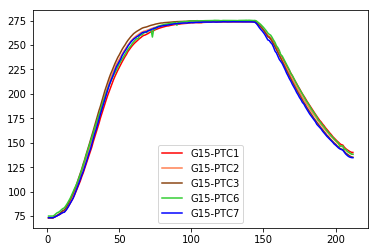

In [0]:
from operator import mod

aPTCno = df.columns[2].strip()      
print(aPTCno)
aPTCno = aPTCno[aPTCno.find('PTC')+3 : len(aPTCno)]
print(aPTCno, mod(int(aPTCno),10))

plotRecipeGroupFileCurve(df)